In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

import crocosi.postp as pp
import dask.dataframe as dd
import pandas as pd

import hvplot.pandas
import hvplot.dask

from glob import glob

In [2]:
from dask.distributed import Client
client = Client()  # set up local cluster on your laptop
client

Client Scheduler: tcp://127.0.0.1:49419 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 4 Memory: 8.59 GB


In [3]:
root_path = '/Users/zcaspar/'
#run = 'jet_cfg1_wp9_4km_0a2000j/'
run = 'jet_cfg1_wp75_4km_1500a2000j_floats_lev50_itide/'
#file='t1/file_his_00010101-00010125.nc'
#File='t1'
gparams = {'f0': 1.0313e-4, 'beta': 1.6186e-11}
r = pp.CROCOrun(root_path+run, prefix='file_', open_nc=['surf'], grid_params=gparams)

In [4]:
r['surf']

<xarray.Dataset>
Dimensions:              (axis_nbounds: 2, s_rho_slice0: 1, time: 14400, x_rho: 258, x_u: 257, y_rho: 722, y_v: 721)
Coordinates:
    xi_u                 (y_rho, x_u) float32 dask.array<chunksize=(722, 257), meta=np.ndarray>
    xi_v                 (y_v, x_rho) float32 dask.array<chunksize=(721, 258), meta=np.ndarray>
    eta_v                (y_v, x_rho) float32 dask.array<chunksize=(721, 258), meta=np.ndarray>
    eta_u                (y_rho, x_u) float32 dask.array<chunksize=(722, 257), meta=np.ndarray>
    eta_rho              (y_rho, x_rho) float32 dask.array<chunksize=(722, 258), meta=np.ndarray>
    xi_rho               (y_rho, x_rho) float32 dask.array<chunksize=(722, 258), meta=np.ndarray>
  * s_rho_slice0         (s_rho_slice0) float32 -0.01
    time_instant         (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time                 (time) float64 1.5e+03 1.5e+03 ... 1.6e+03 1.6e+03
    f                    (y_rho, x_rho) float32 dask.array<

## Visualisation données modèle surface : 

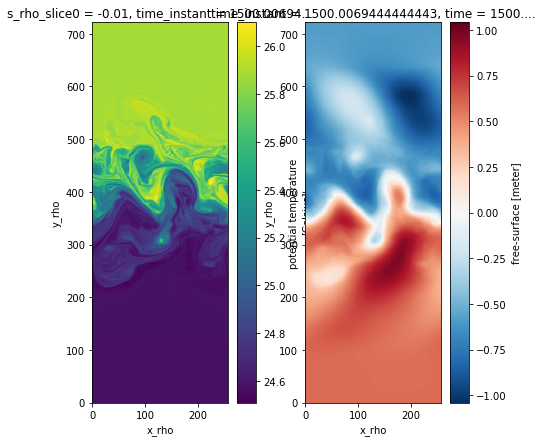

In [4]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,2,1)
r['surf'].T.isel(time=0).plot(ax=ax)
ax.set_aspect('equal')
ax1 = fig.add_subplot(1,2,2)
r['surf'].ssh.isel(time=0).plot(ax=ax1)
ax1.set_aspect('equal')

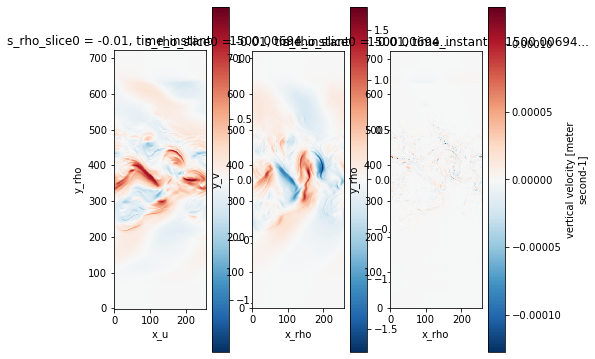

In [5]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,3,1)
r['surf'].u.isel(time=0).plot(ax=ax)
ax.set_aspect('equal')
ax1 = fig.add_subplot(1,3,2)
r['surf'].v.isel(time=0).plot(ax=ax1)
ax1.set_aspect('equal')
ax2 = fig.add_subplot(1,3,3)
r['surf'].w.isel(time=0).plot(ax=ax2)
ax2.set_aspect('equal')

### t=1600

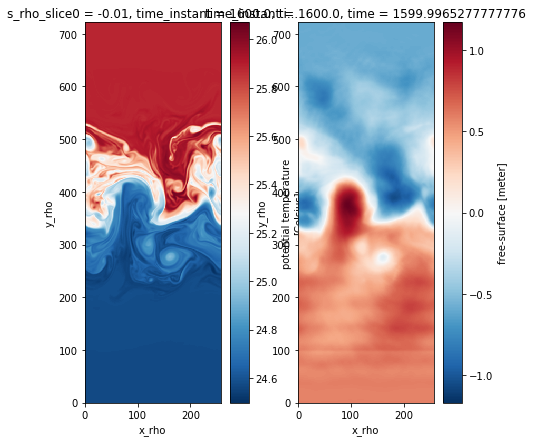

In [40]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,2,1)
r['surf'].T.isel(time=-1).plot(ax=ax,cmap='RdBu_r')
ax.set_aspect('equal')
ax1 = fig.add_subplot(1,2,2)
r['surf'].ssh.isel(time=-1).plot(ax=ax1)
ax1.set_aspect('equal')
#fig.tight_layout()

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  # This is added back by InteractiveShellApp.init_path()


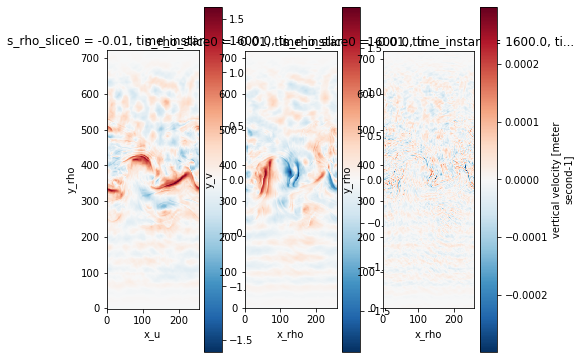

In [8]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,3,1)
r['surf'].u.isel(time=-1).plot(ax=ax)
ax.set_aspect('equal')
ax1 = fig.add_subplot(1,3,2)
r['surf'].v.isel(time=-1).plot(ax=ax1)
ax1.set_aspect('equal')
ax2 = fig.add_subplot(1,3,3)
r['surf'].w.isel(time=-1).plot(ax=ax2)
ax2.set_aspect('equal')
fig.tight_layout()

### Mean flow :

In [36]:
umean = r['surf'].u.mean('time')

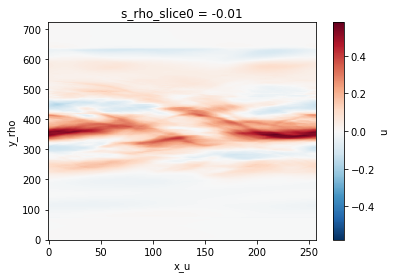

In [38]:
umean.plot()


## Floats :

In [9]:
path_data='/Users/zcaspar/jet_cfg1_wp75_4km_1500a2000j_floats_lev50_itide/'
df = dd.read_csv(glob(path_data+'t1/float.????'), 
                 names=['id','time','xgrid','ygrid','zgrid','depth','temp','X1','X2','X3','X4','X5'],
                 delim_whitespace=True).persist()

In [25]:
df.head()

,id,time,xgrid,ygrid,zgrid,depth,temp,X1,X2,X3,X4,X5
0,7121,1500.0069,196.41081,481.59563,50.0,-0.624316,25.823035,0.074306,-0.108079,9.358383e-07,2.762357e-07,-5.205613
1,7122,1500.0069,196.41329,483.10051,50.0,-0.630595,25.838072,0.109463,-0.108583,3.785995e-07,2.491213e-07,-5.266651
2,7123,1500.0069,196.41301,484.60570,50.0,-0.637787,25.822434,0.107754,-0.108022,1.098272e-08,2.448898e-07,-5.337755
3,7124,1500.0069,196.41278,486.11097,50.0,-0.644454,25.751785,0.101182,-0.102941,3.425864e-07,9.976710e-08,-5.405755
4,7125,1500.0069,196.41582,487.61541,50.0,-0.652465,25.700231,0.136945,-0.107402,9.570112e-07,-6.209097e-08,-5.486258


In [10]:
floats_t0 = df.groupby('time').get_group(1520).compute().sort_values('id').set_index('id')

In [11]:
floats_tf = df.groupby('time').get_group(1600).compute().sort_values('id').set_index('id')

### Maps floats : 

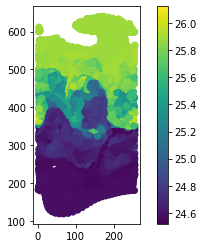

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cs = ax.scatter(floats_t0.xgrid,floats_t0.ygrid,c = floats_t0.temp)
ax.set_aspect('equal')
plt.colorbar(cs)

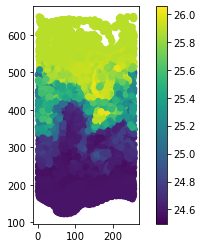

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cs = ax.scatter(floats_tf.xgrid,floats_tf.ygrid,c = floats_tf.temp)
ax.set_aspect('equal')
plt.colorbar(cs)

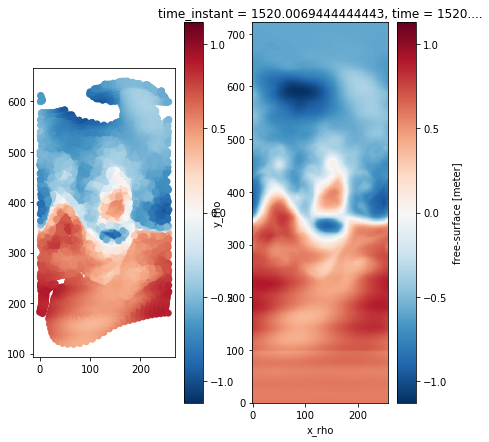

In [14]:
vmin = r['surf'].ssh.sel(time=1520,method='nearest').min().values
vmax = r['surf'].ssh.sel(time=1520,method='nearest').max().values
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,2,1)
cs = ax.scatter(floats_t0.xgrid,floats_t0.ygrid,c = floats_t0.depth,cmap='RdBu_r',vmin=vmin,vmax=np.abs(vmin))
ax.set_aspect('equal')
plt.colorbar(cs)
ax1 = fig.add_subplot(1,2,2)
r['surf'].ssh.sel(time=1520,method='nearest').plot(ax=ax1)
ax1.set_aspect('equal')

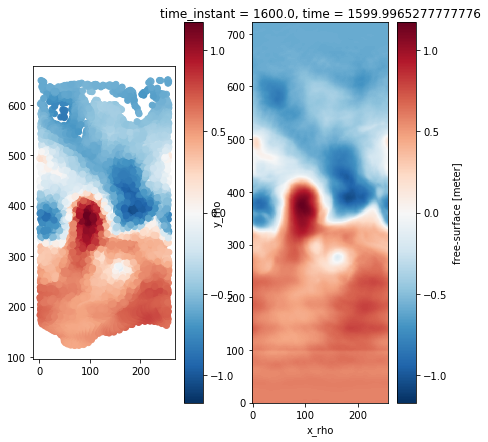

In [16]:
vmin = r['surf'].ssh.sel(time=1600,method='nearest').min().values
vmax = r['surf'].ssh.sel(time=1600,method='nearest').max().values
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,2,1)
cs = ax.scatter(floats_tf.xgrid,floats_tf.ygrid,c = floats_tf.depth,cmap='RdBu_r',vmin=-1*vmax, vmax=vmax)
ax.set_aspect('equal')
plt.colorbar(cs)
ax1 = fig.add_subplot(1,2,2)
r['surf'].ssh.sel(time=1600,method='nearest').plot(ax=ax1)
ax1.set_aspect('equal')

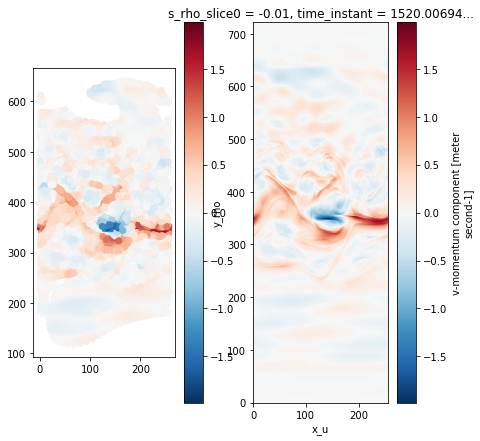

In [17]:
vmin = r['surf'].u.sel(time=1520,method='nearest').min().values
vmax = r['surf'].u.sel(time=1520,method='nearest').max().values
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,2,1)
cs = ax.scatter(floats_t0.xgrid,floats_t0.ygrid,c = floats_t0.X1,cmap='RdBu_r',vmin=vmin,vmax=np.abs(vmin))
ax.set_aspect('equal')
plt.colorbar(cs)
ax1 = fig.add_subplot(1,2,2)
r['surf'].u.sel(time=1520,method='nearest').plot(ax=ax1)
ax1.set_aspect('equal')

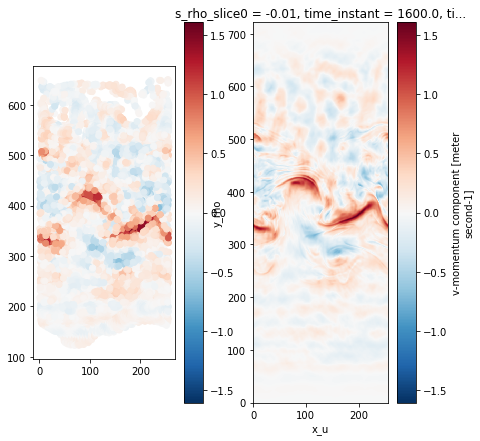

In [18]:
vmin = r['surf'].u.sel(time=1600,method='nearest').min().values
vmax = r['surf'].u.sel(time=1600,method='nearest').max().values
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,2,1)
cs = ax.scatter(floats_tf.xgrid,floats_tf.ygrid,c = floats_tf.X1,cmap='RdBu_r',vmin=-1*vmax,vmax=vmax)
ax.set_aspect('equal')
plt.colorbar(cs)
ax1 = fig.add_subplot(1,2,2)
r['surf'].u.sel(time=1600,method='nearest').plot(ax=ax1)
ax1.set_aspect('equal')

In [59]:
vmin.values


array(-1.1271337, dtype=float32)